<a href="https://colab.research.google.com/github/sukilsiva/Machine-Learnig-Deep-Learning-Code/blob/master/GANMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import tensorflow as tf
mnist = input_data.read_data_sets("/MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f0358104518>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f031cc51dd8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f031cc51f98>)

In [4]:
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/MNIST_data/",one_hot=True)

Extracting /MNIST_data/train-images-idx3-ubyte.gz
Extracting /MNIST_data/train-labels-idx1-ubyte.gz
Extracting /MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
img_dim =  784
disc_dim = 256
gen_dim = 256
noise_dim = 100

In [0]:
disc_inp = tf.placeholder(tf.float32, shape = [None, img_dim])
gen_inp = tf.placeholder(tf.float32, shape=[None, noise_dim])

In [0]:
batch_size = 128
learning_rate = 2e-4
num_steps = 80000
display_step = 20

In [0]:
# Weigth Function
def weight_init(shape):
  return tf.random_normal(shape = shape, stddev= 1./tf.sqrt(shape[0]/2.))

In [0]:
w = {"w1" :tf.Variable(weight_init([noise_dim,gen_dim])),
     "w2" :tf.Variable(weight_init([gen_dim,img_dim])),
     "w3" :tf.Variable(weight_init([img_dim,disc_dim])),
     "w4" :tf.Variable(weight_init([disc_dim,1]))}

b = {"b1" :tf.Variable(tf.zeros([gen_dim])),
     "b2" :tf.Variable(tf.zeros([img_dim])),
     "b3" :tf.Variable(tf.zeros([disc_dim])),
     "b4" :tf.Variable(tf.zeros([1]))}

In [0]:
def generator(x):
  h1 = tf.matmul(x, w["w1"])
  h1 = tf.add(h1, b["b1"])
  h1 = tf.nn.relu(h1)

  h1 = tf.matmul(h1, w["w2"])
  h1 = tf.add(h1, b["b2"])
  h1 = tf.nn.sigmoid(h1)

  return h1

In [0]:
def discriminator(z):
  h2 = tf.matmul(z, w["w3"])
  h2 = tf.add(h2, b["b3"])
  h2 = tf.nn.relu(h2)

  h2 = tf.matmul(h2, w["w4"])
  h2 = tf.add(h2, b["b4"])
  h2 = tf.nn.sigmoid(h2)

  return h2

In [0]:

gen_output = generator(gen_inp)

disc_real_output = discriminator(disc_inp)
disc_fake_output = discriminator(gen_output)

In [0]:
gen_optmizer = tf.train.AdamOptimizer(learning_rate= learning_rate)
disc_optimizer = tf.train.AdamOptimizer(learning_rate= learning_rate)
gen_cost = -tf.reduce_mean(tf.log(disc_fake_output))
disc_cost = -tf.reduce_mean(tf.log(disc_real_output) + tf.log(1.-disc_fake_output))

In [0]:
var_gen = [w["w1"], w["w2"], b["b1"], b["b2"]]
var_disc = [w["w3"], w["w4"], b["b3"], b["b4"]]

training_gen = gen_optmizer.minimize(gen_cost, var_list= var_gen)
training_disc = gen_optmizer.minimize(disc_cost, var_list= var_disc)

step 1 : discriminator loss : 1.013568, generator loss : 1.166539
step 2000 : discriminator loss : 5.475441, generator loss : 0.017478
step 4000 : discriminator loss : 3.991627, generator loss : 0.044476
step 6000 : discriminator loss : 4.209232, generator loss : 0.133235
step 8000 : discriminator loss : 4.736097, generator loss : 0.120654
step 10000 : discriminator loss : 3.754936, generator loss : 0.308301
step 12000 : discriminator loss : 4.051084, generator loss : 0.266000
step 14000 : discriminator loss : 3.981770, generator loss : 0.243460
step 16000 : discriminator loss : 3.084364, generator loss : 0.343241
step 18000 : discriminator loss : 3.532981, generator loss : 0.363950
step 20000 : discriminator loss : 3.258045, generator loss : 0.304168
step 22000 : discriminator loss : 3.681183, generator loss : 0.270591
step 24000 : discriminator loss : 3.918086, generator loss : 0.232301
step 26000 : discriminator loss : 3.239491, generator loss : 0.302955
step 28000 : discriminator l

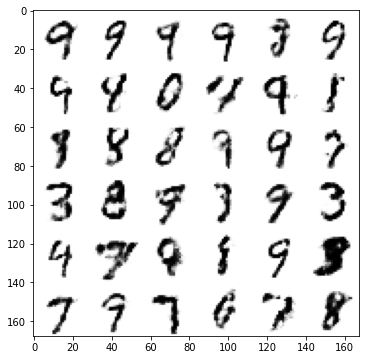

In [15]:
# intialize the variable

init = tf.global_variables_initializer()

#starting the trainig session
with tf.Session() as sess:
  sess.run(init)
  
  for step in range(1, num_steps +1):
    batch_x,_ = mnist.train.next_batch(batch_size=batch_size)

    #Generating the noise  
    noise_temp = np.random.uniform(-1., 1., size=[batch_size, noise_dim])
    
    #Feeding the values to discriminator and generator
    feed_dict = {disc_inp :batch_x, gen_inp :noise_temp}
    _,_,gl,dl = sess.run([training_gen, training_disc, gen_cost, disc_cost], feed_dict = feed_dict)

    if step % 2000 ==0 or step == 1:
      print("step %i : discriminator loss : %f, generator loss : %f" %(step, gl, dl))
  print("Finished")

  #testing
  #generating the images using generator
  n=6
  canvas = np.empty((28*n, 28*n))

  for i in range(n):
    z = np.random.uniform(-1., 1., size=[n, noise_dim])
    g = sess.run(gen_output, feed_dict={gen_inp:z})
    g = -1 *(g-1)
    for j in range(n):
      canvas[i*28:(i+1)*28,j*28:(j+1)*28]=g[j].reshape(28,28)

  plt.figure(figsize=(n,n))
  plt.imshow(canvas, origin="upper", cmap="gray")
  plt.show()